# Supervised Learning – Classification

![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Classification.JPG?raw=true "Classification use case examples"

The answers to these questions are a discrete class. The number of level or class can
vary from a minimum of two (example: true or false, yes or no) to multiclass. In machine
learning, classification deals with identifying the probability of a new object being a
member of a class or set. The classifiers are the algorithms that map the input data (also
called features) to categories.

# Logistic Regression
Let’s consider a use case where we have to predict students’ test outcomes, that is, pass
(1) or fail (0) based on hours studied. In this case the outcome to be predicted is discrete.
Let’s build a linear regression and try to use a threshold, that is, anything over some value
is pass, or else it’s fail.

In [24]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1
R Squared :  0.675
Mean Absolute Error:  0.22962962963
Root Mean Squared Error:  0.268741924943


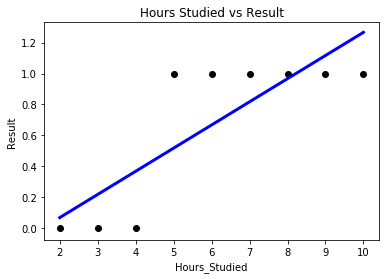

In [7]:
# Logistic regression
# Load data
df = pd.read_csv('data/Grade_Set_1_Classification.csv')
print (df)
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Result                       # dependent variable
# Create linear regression object
lr = lm.LinearRegression()
# Train the model using the training sets
lr.fit(x, y)
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
# add predict value to the data frame
df['Result_Pred'] = lr.predict(x)
# Using built-in function
print ("R Squared : ", r2_score(df.Result, df.Result_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result,df.Result_Pred)))

The outcome that we are expecting is either 1 or 0, and the issue with linear regression is that it can give values large than 1 or less than 0. In the above plot we can see that linear regression is not able to draw boundaries to classify observations. The solution to this is to introduce **sigmoid or Logit function** (which takes a S shape) to the regression equation. The fundamental idea here is that the hypothesis will use the linear approximation, then map it with a logistic function for binary prediction. 
<br>
linear regression equation in this case is **y = mx + c**
<br>
<font color="red"> ** Logistic regression ** </font> can be explained better in odds ratio. The odds of an event occurring are defined as the probability of an event occurring divided by the probability of that event not occurring.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Logistic.JPG?raw=true "Fitting a Slope"

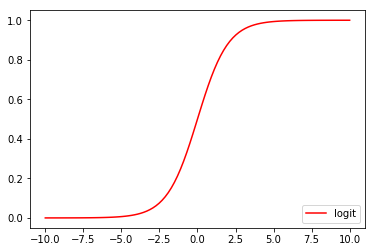

In [8]:
# Linear regression vs. logistic regression
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

The probability of pass is p = .66 and fail is f = 1 - p = .33 <br>

The odds of pass and the odds of fail are reciprocals of one another, i.e., 1/2 = .5 and 1/.5 = 2<br>

Now we can use the probabilities to compute the odds of pass and fail, odds(pass) = p/(1-p) or p/f = .66/.33 = 2 odds(fail) = (1-p)/p or f/p = .33/.66 = .5<br>

Next, we compute the odds ratio for , Odds Ration = 2/.5 = 4<br>

Thus the odds of being pass grows 4 times larger with every unit increase in hours studied

[ 0.38623098  0.49994056  0.61365629  0.71619252  0.80036836  0.86430823
  0.91006991  0.94144416  0.96232587]
[0 0 1 1 1 1 1 1 1]


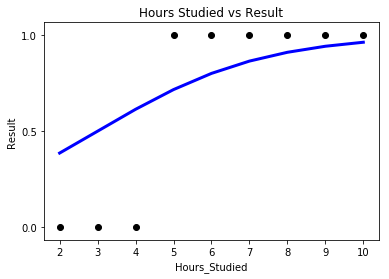

In [14]:
# Logistic regression using scikit-learn
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]       # independent variable
y = df['Result']                      # dependent variable 

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

# predict_proba will return array containing proability of y = 0 and y = 1
print (model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0  
print (model.predict(x))

# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

# Confusion matrix
Evaluating a Classification Model Performance Confusion matrix is the table that is used for describing the performance of a classification model.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/ConfusionMatrix.JPG?raw=true "Confusion matrix"

- True Negatives (TN): Actual FALSE, which was predicted as FALSE
- False Positives (FP): Actual FALSE, which was predicted as TRUE (Type I error)
- False Negatives (FN): Actual TRUE, which was predicted as FALSE (Type II error)
- True Positives (TP): Actual TRUE, which was predicted as TRUE 
Ideally a good model should have high TN and TP and less of Type <font color="blue"> **I & II errors** </font>. Table 3-11 describes the key metrics derived out of the confusion matrix to understand the classification model performance.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/ConfusionTable.JPG?raw=true "Confusion matrix table"

In [15]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 0.888888888889
AUC : 1.0
Confusion matrix : [[2 1]
 [0 6]]
classification report :              precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.86      1.00      0.92         6

avg / total       0.90      0.89      0.88         9



# ROC Curve
A ROC curve is one more important metric, and it’s a most commonly used way to visualize the performance of a binary classifier, and AUC is believed to be one of the best ways to summarize performance in a single number. AUC indicates that the probability of a randomly selected positive example will be scored higher by the classifier than a randomly selected negative example. If you have multiple models with nearly the same accuracy, you can pick the one that gives a higher AUC.

ROC AUC: 1.00


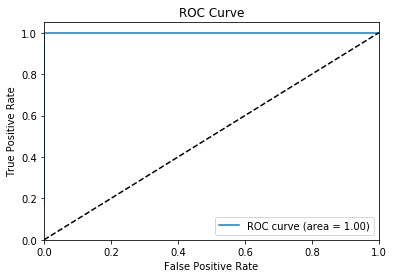

In [17]:
# Area Under the Curve
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In the above case, AUC is 100% as the model is able to predict all the positive instances as true positive.

# Fitting Line
The inverse of regularization is one of the key aspects of fitting a logistic regression line. It defines the complexity of the fitted line. Let’s try to fit lines for different values for this parameter (C, default is 1) and see how the fitting line and the accuracy changes.

C = 1 (default), Accuracy : 0.888888888889
C = 10, Accuracy : 1.0
C = 100, Accuracy : 1.0
C = 1000, Accuracy : 1.0


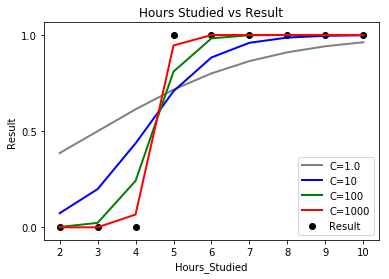

In [18]:
# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
print ("C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x)))

# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(C=10)
model1 = model1.fit(x, y)

# check the accuracy on the training set
print ("C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x)))

# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(C=100)
model2 = model2.fit(x, y)

# check the accuracy on the training set
print ("C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x)))

# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(C=1000)
model3 = model3.fit(x, y)

# check the accuracy on the training set
print ("C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x)))


# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='gray', linewidth=2, label='C=1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color='blue', linewidth=2,label='C=10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color='green', linewidth=2,label='C=100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color='red', linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

# Stochastic Gradient Descent

Fitting the right slope that minimizes the error (also known as cost function) for a large dataset can be tricky. However this can be achieved through a stochastic gradient descent (steepest descent) optimization algorithm. In case of regression problems, the cost function J to learn the weights can be defined as the sum of squared errors (SSE) between
actual vs. predicted value.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Stochastic.JPG?raw=true "Stochastic Gradient Descent"
Alpha (α) is the learning rate, and choosing a smaller value for the same will ensure that the algorithm dos not miss global cost minimum.

![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Gradientdescent.JPG?raw=true "Gradient Descent"
The default solver parameter for logistic regression in scikit-learn is 'liblinear', which works fine for smaller datasets. For a large dataset with a large number of independent variables, ‘sag’ (stochastic average gradient descent) is the recommended solver to fit the optimal slope faster.

# Regularization
With an increase in the number of variables, the probability of over-fitting also increases. **LASSO (L1) and Ridge (L2)** can be applied for logistic regression as well to avoid over-fitting. Let’s look at an example to understand the over-/under-fitting issue in logistic regression.

Train Accuracy for C=0.01:  0.624242424242
Test Accuracy for C=0.01:  0.619718309859
Train Accuracy for C=1:  0.842424242424
Test Accuracy for C=1:  0.859154929577
Train Accuracy for C=10000:  0.860606060606
Test Accuracy for C=10000:  0.788732394366


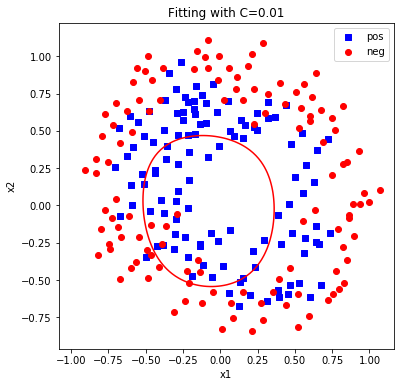

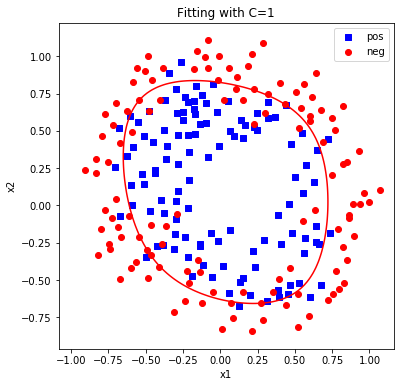

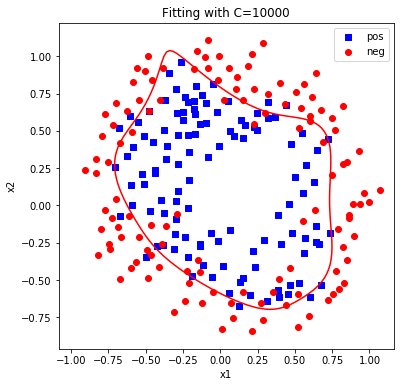

In [25]:
# Under-fitting, right-fitting, and over-fitting
import pandas as pd
data = pd.read_csv('data/LR_NonLinear.csv')
pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

# function to draw scatter plot between two variables
def draw_plot():
    plt.figure(figsize=(6, 6))
    plt.scatter(np.extract(pos, x1),
                np.extract(pos, x2),
                c='b', marker='s', label='pos')
    plt.scatter(np.extract(neg, x1),
                np.extract(neg, x2),
                c='r', marker='o', label='neg')
    plt.xlabel('x1');
    plt.ylabel('x2');
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend();
    
# create hihger order polynomial for independent variables
order_no = 6

# map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order=order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(iter())
out = map_features(data['x1'], data['x2'], order=order_no)
X = out.transpose()
y = data['class']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order=order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels=[0], colors=['r'])
    
# fit with c = 0.01
clf = LogisticRegression(C=0.01).fit(X_train, y_train)
print ('Train Accuracy for C=0.01: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=0.01: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=0.01')
draw_boundary(clf)
plt.legend();

# fit with c = 1
clf = LogisticRegression(C=1).fit(X_train, y_train)
print ('Train Accuracy for C=1: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=1: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=1')
draw_boundary(clf)
plt.legend();

# fit with c = 10000
clf = LogisticRegression(C=10000).fit(X_train, y_train)
print ('Train Accuracy for C=10000: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=10000: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=10000')
draw_boundary(clf)
plt.legend();

By default l2 is the regularization for logistic regression. <br>
Notice that with higher-order regularization, value over-fitting occurs, and the same can be determined by looking at the accuracy between train and test datasets, that is, the accuracy drops significantly in the test dataset.

# Multiclass Logistic Regression
Logistic regression can also be used to predict the dependent or target variable with multiclass. Let’s learn multiclass prediction with iris dataset, one of the best-known databases to be found in the pattern recognition literature. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. This comes as part
of the scikit-learn datasets, where the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

# Load Data

In [26]:
# Load data
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Normalize Data
The unit of measurement might differ so let’s normalize the data before building the model.

In [27]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Split Data
Split data into train and test. Whenever we are using random function it’s advised to use a seed to ensure the reproducibility of the results. 

In [28]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training Logistic Regression Model and Evaluating

In [29]:
# Logistic regression model training and evaluation
from sklearn.linear_model import LogisticRegression
# l1 regularization gives better results
lr = LogisticRegression(penalty='l1', C=10, random_state=0)
lr.fit(X_train, y_train)
from sklearn import metrics
# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train,lr.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, lr.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test,lr.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, lr.predict(X_test)))

Train - Accuracy : 0.980952380952
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.94      0.97        32
          2       0.95      1.00      0.97        39

avg / total       0.98      0.98      0.98       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



# Generalized Linear Model (GLM)
GLM was an effort by John Nelder and Robert Wedderburn to unify commonly used various statistical models such as linear, logistic and poission etc.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/GLM.JPG?raw=true "Generalized Linear Model(GLM)"

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

**Load data** <br>
Lets consider a usecase where we have to predict students test outcome i.e., pass (1) or fail(0) based on hours studied.<br>
In this case the outcome to be predicted is discrete.


In [33]:
# Load data

df = pd.read_csv('data/Grade_Set_1.csv')
print (df)

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


In [34]:
print('####### Linear Regression Model ########')
# Create linear regression object
lr = lm.LinearRegression()

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable 

# Train the model using the training sets
lr.fit(x, y)

print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

print('\n####### Generalized Linear Model ########')
import statsmodels.api as sm

# To be able to run GLM, we'll have to add the intercept constant to x variable
x = sm.add_constant(x, prepend=False)

# Instantiate a gaussian family model with the default link function.
model = sm.GLM(y, x, family = sm.families.Gaussian())
model = model.fit()
print (model.summary())

####### Linear Regression Model ########
Intercept:  49.6777777778
Coefficient:  [ 5.01666667]

####### Generalized Linear Model ########
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                    5.3626984127
Method:                          IRLS   Log-Likelihood:                -19.197
Date:                Thu, 14 Dec 2017   Deviance:                       37.539
Time:                        11:11:54   Pearson chi2:                     37.5
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

Note that the coeffeicients are same for both linear regression and GLM. However GLM can be used for other distributions such as binomial, poisson etc by just changing the family parameter.


# Supervised Learning – Process Flow
let me summarize the process flow for supervised learning in figure below.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/flow.png?raw=true "Supervised Learning flow"
First you need to train and validate a supervised model by applying machine learning techniques to historical data. Then apply this model onto the new dataset to predict the future value.

In 1986, J.R. Quinlan published ‘Induction of Decision Trees’ summarizing an approach to synthesizing decision trees using machine learning with an illustrative example dataset, where objective is to take a decision on whether to play outside on a Saturday morning. As the name suggest, a decision tree is a tree-like structure where internal node represents test on an attribute, each branch represents outcome of test and each leaf node represents class label, decision taken after computing all attributes. A path from root to leaf represents classification rules. Thus, a decision tree consists of 3 types of nodes. 
- Root node 
- Branch node 
- Leaf node (class label)

<p>
Decision tree model output is easy to interpret and it provides the rules that drive a decision or event, in the above use case we can get the rules that lead to don’t play scenario i.e., </p>
- sunny and temperature > 30^o c <br>
- rainy and windy is true. 
<p>
Often business might be interested in these decision rules than the decision itself. For example insurance company might be interested in the rules or condition in which an insurance applicant should be sent for medical checkup rather than feeding the applicants data to a black box model to find the decision. <br>
Use training data to build tree generator model, which will determine which variable to split at a node and the value of the split. Decision to stop or split again, assigns leaf nodes to a class. Advantage of decision tree is that there is no need of exclusive creation of dummy variables.</p>

###  How the Tree Splits and Grows?
- The base algorithm is known as a greedy algorithm, in which the tree is constructed in a top-down recursive divide-and-conquer manner.
- At start, all the training examples are at the root.
- Input data is partitioned recursively based on selected attributes.
- Test attributes at each node are selected on the basis of a heuristicor statistical impurity measure example, gini, or information gain (entropy).
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Tree.JPG?raw=true "Tree Splits"

### J.R. Quinlan’s example for synthesizing decision tree
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/tree2.png?raw=true "Fitting a Slope"

### Multivariate and Multi-class Decision Tree
Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [35]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

# X = iris.data[:, [2, 3]]
X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [37]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [39]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)

# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 1.0
Train - Confusion matrix : [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        32
          2       1.00      1.00      1.00        39

avg / total       1.00      1.00      1.00       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Visualize Decision Tree

In [ ]:
from sklearn.externals.six import StringIO
import pydot
out_data = StringIO()
tree.export_graphviz(clf, out_file=out_data,
                    feature_names=iris.feature_names,
                    class_names=clf.classes_.astype(int).astype(str),
                    filled=True, rounded=True,
                    special_characters=True,
                    node_ids=1,)
graph = pydot.graph_from_dot_data(out_data.getvalue())
graph[0].write_pdf("iris.pdf")  # save to pdf

### Key Parameters for Stopping Tree Growth
One of the key issues with the decision tree is that the tree can grow very large, ending up creating one leaf per observation.
- **max_features:** maximum features to be considered while deciding each split,
- **default=“None”** which means all features will be considered
- **min_samples_split:** split will not be allowed for nodes that do not meet this number
- **min_samples_leaf:** leaf node will not be allowed for nodes less than the minimum samples
- **max_depth:** no further split will be allowed, default=“None”

# Support Vector Machine

Key objective of SVM is to draw a hyperplane which separates the two classes optimally such that the margin is maximum between the hyperplane and the observations. Below figure  illustrates that there is possibility of different hyperplane, however the objective of SVM is to find the one which gives us high margin.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/SVM.JPG?raw=true "Support Vector Machine"

### Key parameters

- C: This is the penalty parameter and helps in fitting the boundaries smoothly and appropriately, default=1
- Kernel: It must be one of rbf/linear/poly/sigmoid/precomputed, default=’rbf’(Radial Basis Function). Choosing appropriate kernel will result in better model fit.


# Multivariate and Multi-class Decision Tree
Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [47]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
# X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [49]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [51]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.952380952381
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Plot Decision Boundary
Let's consider a two class example to keep things simple.

In [52]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# build a simple logistic regression model
clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

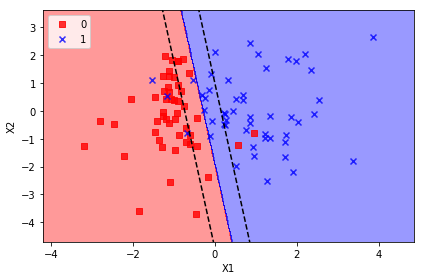

In [53]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



# k Nearest Neighbors (kNN)
K nearest neighbor classification was developed from the need to perform discriminant analysis when reliable parametric estimates of probability densities are unknown or difficult to determine. Fix and Hodges in 1951 introduced a non-parametric method for pattern classification that has since become known the k nearest neighbor rule. <br>
As the name suggests the algorithm works based on a majority vote of its k nearest neighbors class. In figure below, k = 5 nearest neighbors for the unknown data point are identified based on the chosen distance measure, and the unknown point will be classified based on the majority class among identified nearest data points class. The key drawback of kNN is the complexity in searching the nearest neighbors for each sample. <br>
Things to remember:
- Choose an odd k value for a two-class problem
- k must not be a multiple of the number of classes.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/knn.png?raw=true "k Nearest Neighbors (kNN)"

### Load Data

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [54]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

In [55]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [57]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.971428571429
Train - Confusion matrix : [[34  0  0]
 [ 0 31  1]
 [ 0  2 37]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.94      0.97      0.95        32
          2       0.97      0.95      0.96        39

avg / total       0.97      0.97      0.97       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Plot Decision Boundary 
Let's consider a two class example to keep things simplev

In [60]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# build a simple logistic regression model
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

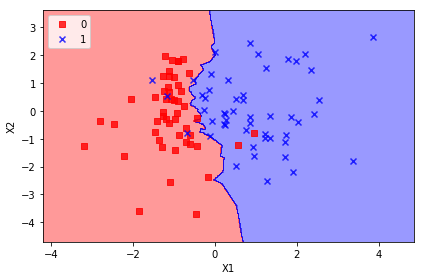

In [61]:
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

** <font color= "red">  ■ Note </font> ** Decision Trees, SVM, and kNNbase algorithm concepts can essentially be applied to predict dependent variables that are continuous numbers in nature, and Scikit-learn provides DecisionTreeRegressor, SVR (support vector regressor), and kNeighborsRegressor for the same.

# Time-Series Forecasting
In simple terms data points that are collected sequentially at a regular interval with association over a time period is termed time-series data. A time-series data having the mean and variance as a constant is called a stationary time series. Time series tend to have a linear relationship between lagged variables and this is called an autocorrelation. Hence a time series historic data can be modeled to forecast the future data points without involvement of any other independent variables; these types of models are generally known as time-series forecasting. To name some key areas of applications of time series, these include sales forecasting, economic forecasting, stock market forecasting, etc.<br>
### Components of Time Series
A time series can be made up of three key components. <br>
- Trend – A long-term increase or decrease are termed trends.
- Seasonality An effect of seasonal factors for a fixed or known period. For example, retail stores sales will be high during weekends and festival seasons.
- Cycle – These are the longer ups and downs that are not of fixed or known periods caused by external factors.

![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/TimeSeries.png?raw=true "Fitting a Slope"


# Autoregressive Integrated Moving Average (ARIMA)
ARIMA is one of the key and popular time-series models, so understanding the concept involved will set the base for you around time-series modeling. Autoregressive Model (AM): As the name indicates, it is a regression of the variable
against itself , that is, the linear combination of past values of the variables are used to forecast the future value.
![alt text][logo]


[logo]: https://github.com/sara-kassani/Python/blob/master/data/ARIMA.JPG?raw=true "ARIMA"

The predictors on the right side of the equation are the lagged values, errors, and it is also known as ARIMA (p, d, q) model. These are the key parameters of ARIMA and picking the right value for p, d, q will yield better model results.
<br>
p = order of the autoregressive part. That is the number of unknown terms that multiply your signal at past times (so many past times as your value p). 
<br>
d = degree of first differencing involved. Number of times you have to difference your
time series to have a stationary one. 
<br>
q = order of the moving average part. That is the number of unknown terms that multiply your forecast errors at past times (so many past times as your value q).

# Running ARIMA Model
- Plot the chart to ensure trend, cycle, or seasonality exists in the dataset.
- Stationarize series: To stationarize series we need to remove trend (varying mean) and seasonality (variance) components from the series. Moving average and differencing technique can be used to stabilize trend, whereas log transform will stabilize the seasonality variance. Further, the Dickey Fuller test can be used to assess the stationarity of series, that is, null hypothesis for a Dickey Fuller test is that the data are stationary, so test result with p value > 0.05 means data is non-stationary.
- Find optimal parameter: Once the series is stationarized you can look at the Autocorrelation function (ACF) and Partial autocorrelation function (PACF) graphical plot to pick the number of AR or MA terms needed to remove autocorrelation. ACF is a bar chart between correlation coefficients and lags; similarly PACF is the bar chart between partial correlation (correlation between variable and lag of itself not explained by correlation at all lower-order lags) coefficient and lags.
- Build Model and Evaluate: Since time series is a continuous number Mean Absolute Error and Root Mean Squared Error can be used to evaluate the deviation between actual and predicted values in train dataset. Other useful matrices would be Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC); these are part of information theory to estimate the quality of individual models given a collection of models, and they favor a model with smaller residual errors.
<br>
AIC = -2log(L) + 2(p+q+k+1) where L is the maximum likelihood function of fitted model and p, q, k are the number of parameters in the model <br>
BIC = AIC+(log(T)−2)(p+q+k+1)

# Autoregressive Integrated Moving Average (ARIMA)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

from statsmodels.tsa.stattools import adfuller

# function to calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error


Let's predict sales data using ARIMA

In [64]:
# Data Source: O.D. Anderson (1976), in file: data/anderson14, Description: Monthly sales of company X Jan ’65 – May ’71 C. Cahtfield        
df = pd.read_csv('data/TS.csv')
ts = pd.Series(list(df['Sales']), index=pd.to_datetime(df['Month'],format='%Y-%m'))

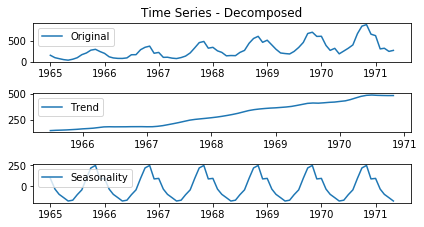

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.title('Time Series - Decomposed')
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

### Checking for stationarity
Let's split the data into train and test. Since its a time series let's consider 1965 to 1968 for training and reamining for testing.
<br>
Business forecasting edition by Hanke and Wichern recommend a minimum of 4 years of data depending on the regularity of data. If the seasonal pattern is regular 3 year data would be sufficient.


In [66]:
s_test = adfuller(ts, autolag='AIC')
# extract p value from test results
print ("p value > 0.05 means data is non-stationary: ", s_test[1])

p value > 0.05 means data is non-stationary:  0.988889420517


### Remove stationarity

In [67]:
# log transform to remove variability
ts_log = np.log(ts)
ts_log.dropna(inplace=True)

s_test = adfuller(ts_log, autolag='AIC')
print ("Log transform stationary check p value: ", s_test[1])

Log transform stationary check p value:  0.785310212485


In [68]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

s_test = adfuller(ts_log_diff, autolag='AIC')
print ("First order difference stationary check p value: ", s_test[1])

First order difference stationary check p value:  0.0240253928399


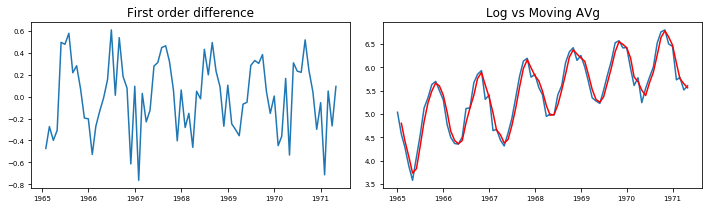

In [70]:
# moving average smoothens the line
moving_avg = pd.rolling_mean(ts_log,2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
ax1.set_title('First order difference')
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
ax1.plot(ts_log_diff)

ax2.plot(ts_log)
ax2.set_title('Log vs Moving AVg')
ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)
ax2.plot(moving_avg, color='red')
plt.tight_layout()

### Autocorrelation test
We determined that the log of time series requires at least one order differening to stationarize. Now lets plot ACV and PACF charts for first order log series

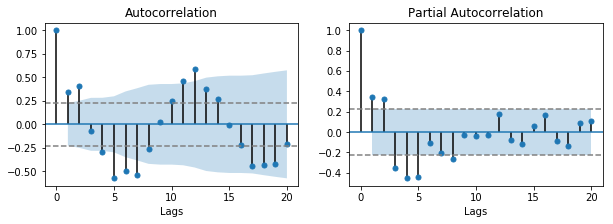

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))

# ACF chart
fig = sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=20, ax=ax1)

# draw 95% confidence interval line
ax1.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.set_xlabel('Lags')

# PACF chart
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=20, ax=ax2)

# draw 95% confidence interval line
ax2.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.set_xlabel('Lags')

PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 and lag-2 autocorrelation.

p = 2 i.e., the lag value where the PACF chart crosses the upper confidence interval for the first time

q = 2 i.e., the lag value where the ACF chart crosses the upper confidence interval for the first time

In [73]:
# build model
model = sm.tsa.ARIMA(ts_log, order=(2,0,2))
results_ARIMA = model.fit(disp=-1) 

ts_predict = results_ARIMA.predict()

# Evaluate model
print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

print ("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values))) 

# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC:  7.852110538082229
BIC:  21.9149430692
Mean Absolute Error:  0.195966078371
Root Mean Squared Error:  0.239792189873
Durbin-Watson statistic : 1.8645775083


Usual practice is to build several models with different p and q and select the one with smallest value of AIC, BIC, MAE and RMSE.

Now lets' increase p to 3 and see if there is any difference in result.

AIC:  -7.7840754254078774
BIC:  8.62256252757
Mean Absolute Error:  0.167234273906
Root Mean Squared Error:  0.216168580372
Durbin-Watson statistic : 2.51977588811


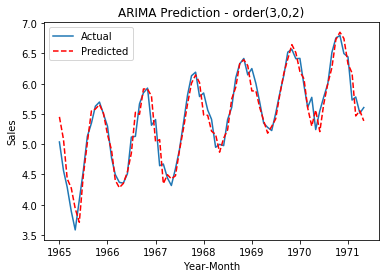

In [74]:
model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
results_ARIMA = model.fit(disp=-1) 

ts_predict = results_ARIMA.predict()
plt.title('ARIMA Prediction - order(3,0,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

print ("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values))) 

# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

### Let's try with one level differencing

AIC:  -35.418987738894
BIC:  -19.1038543569
Mean Absolute Error:  0.138765375164
Root Mean Squared Error:  0.183102428104
Durbin-Watson statistic : 1.94116682352


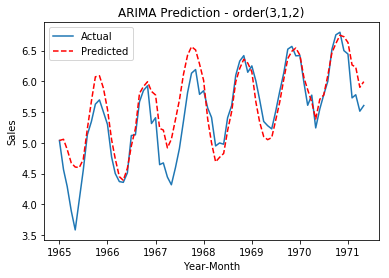

In [75]:
model = sm.tsa.ARIMA(ts_log, order=(3,1,2))
results_ARIMA = model.fit(disp=-1) 

ts_predict = results_ARIMA.predict()

# Correctcion for difference 
predictions_ARIMA_diff = pd.Series(ts_predict, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

plt.title('ARIMA Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(predictions_ARIMA_log, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

print ("Mean Absolute Error: ", mean_absolute_error(ts_log_diff.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log_diff.values, ts_predict.values))) 
# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

In the above chart we can see that the model is over predicting at some places and AIC and BIC values is higher than previous model. Note: AIC/BIC can be positive or negative, however we should look at the absolute value of it for evaluation
<br>
## Predicting the future values

Below values (p=3, d=0, q=2) is giving the smaller number for evaluation matrics, so lets use this as final model to predict the future values i.e., for the year 1972


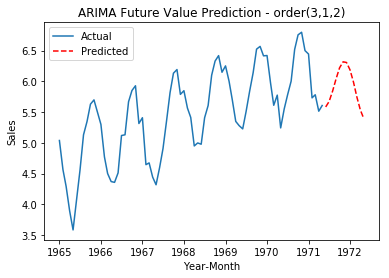

In [76]:
# final model
model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
results_ARIMA = model.fit(disp=-1) 

# predict future values
ts_predict = results_ARIMA.predict('1971-06-01', '1972-05-01')
plt.title('ARIMA Future Value Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

A minimum of 3 to 4 years’ worth of historic data is required to ensure the seasonal patterns are regular.